
## Energy functional in an AF material in the presence of strain

The relevant components of the free energy functional are the magnetocrystalline anisotropy energy and the magnetostriction:  
$E = E_{anis}+E_{ms}$.  
For a tetragonal material, the anisotropy is given by:  
$E_{anis} = K_{2 \parallel} cos^2(\Theta) + K_{4 \parallel} cos^4(\Theta) + K_{4 \perp} sin^4(\Theta) cos(4\phi)$,  
which is reduced to:  
$E_{anis} = K_{4 \perp}cos(4\phi)$  
for the case of a strong in-plane anisotropy.  
The magnetostriction energy is given by:  
$E_{ms} = B_{ij} \epsilon_{ij} \beta_i \beta_j$,  
where $\beta_i$ are the directional cosines.  
For a bent film, the strain tensor $\epsilon_{ij}$ has only one component $\epsilon_{xx}$. Thus,  
$E_{ms} = B \epsilon_{xx} cos^2(\phi)$.  
In the absence of strain, the free energy has the following angle dependence.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

K = 1;

angle = [i for i in range(360)];
Eanis = [-K*np.cos(4*a/180*np.pi)+1 for a in angle];

plt.figure();
plt.plot(angle , Eanis);
plt.xlabel('angle (deg)');
plt.ylabel('energy (A.U.)');

plt.xlim([0, 360]);
plt.show();

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-n107n519 because the default path (/home/petr/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<Figure size 640x480 with 1 Axes>

Adding the straing modifies the energy landscape by shifting the energy minima and lowering the energy barrier. As a consequense, only two global minima remain rendering the <110> crystallographic directions not equivalent.

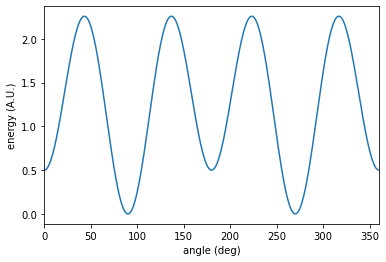

In [2]:
import matplotlib.pyplot as plt
import numpy as np

K = 1;
B = 1;
epsilonXX = 0.5;

angle = [i for i in range(360)];
Eanis = [-K*np.cos(4*a/180*np.pi)+1 for a in angle];
Estrain = [B*epsilonXX*np.cos(a/180*np.pi)**2 for a in angle];

plt.figure();
plt.plot(angle , [sum(x) for x in zip(Eanis, Estrain)]);
plt.xlabel('angle (deg)');
plt.ylabel('energy (A.U.)');

plt.xlim([0, 360]);
plt.show();

In [3]:
import pandas as pd

In [4]:
from scipy.optimize import curve_fit

In [5]:
def linear(x, A):
    return A * x

def quadratic(x, A, B, C):
    return A * x ** 2 + B * x + C

In [6]:
Delta_length

NameError: name 'Delta_length' is not defined

In [ ]:
from ase.units import GPa

In [ ]:
GPa * 1.0e9

In [7]:
strain_110 = pd.read_csv("strain_110_results.csv")
strain_110

,Unnamed: 0,Unnamed: 0.1,collinear_energy,energy,strain,E_110,E_-110,cell_length
0,0,0,-21.346646,-21.681092,-0.05,-21.681092,-21.681102,3.115329
1,1,1,-21.364111,-21.697626,-0.04,-21.697626,-21.697628,3.148122
2,2,2,-21.377288,-21.709892,-0.03,-21.709892,-21.709890,3.180915
3,3,3,-21.386384,-21.718099,-0.02,-21.718099,-21.718089,3.213708
4,4,4,-21.391646,-21.722488,-0.01,-21.722488,-21.722482,3.246501
5,5,5,-21.393291,-21.723272,0.00,-21.723272,-21.723273,3.279294
6,6,6,-21.391528,-21.720666,0.01,-21.720666,-21.720675,3.312087
7,7,7,-21.386563,-21.714869,0.02,-21.714869,-21.714890,3.344880
8,8,8,-21.378588,-21.706080,0.03,-21.706080,-21.706114,3.377673
9,9,9,-21.367794,-21.694492,0.04,-21.694492,-21.694545,3.410466


In [8]:
second_strain_results = pd.read_csv("strain_-110_results.csv", index_col=0)

In [9]:
second_strain_results

,collinear_energy,delta,parallel_energy,perpendicular_energy,strain,E_-110,E_110
0,-21.346673,-6.600000e-06,-21.681117,-21.681123,-0.05,-21.681117,-21.681123
1,-21.364138,2.670000e-06,-21.697653,-21.697650,-0.04,-21.697653,-21.697650
2,-21.377316,9.190000e-06,-21.709923,-21.709914,-0.03,-21.709923,-21.709914
3,-21.386406,1.245000e-05,-21.718122,-21.718109,-0.02,-21.718122,-21.718109
4,-21.391656,8.440000e-06,-21.722499,-21.722490,-0.01,-21.722499,-21.722490
5,-21.393291,6.800000e-07,-21.723273,-21.723272,0.00,-21.723273,-21.723272
6,-21.391521,-9.360000e-06,-21.720659,-21.720669,0.01,-21.720659,-21.720669
7,-21.386552,-1.992000e-05,-21.714860,-21.714880,0.02,-21.714860,-21.714880
8,-21.378577,-3.608000e-05,-21.706072,-21.706108,0.03,-21.706072,-21.706108
9,-21.367788,-5.790000e-05,-21.694487,-21.694545,0.04,-21.694487,-21.694545


In [10]:
def linear_fit(x, y, start=0, stop=None):

    popt, pcov = curve_fit(linear, x[start:stop], y[start:stop])

    print(popt)

    perr = np.sqrt(np.diag(pcov))
    print(perr)
    if stop is None:
        stop = -1
    x_new = np.arange(x[start], x[stop], 0.001)
    y_new = linear(x_new, *popt)

    return popt[0], x_new, y_new

[-0.00125447]
[0.00010108]
[0.00135438]
[0.00010362]


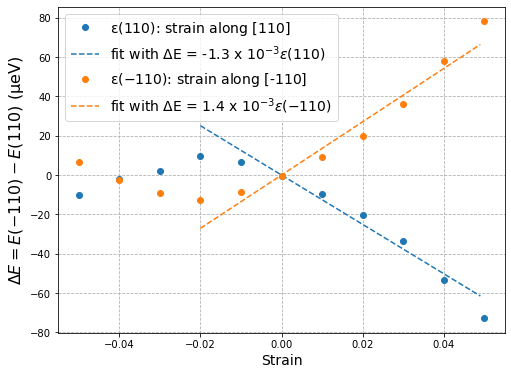

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
start=3
delta_110 = strain_110["E_-110"] - strain_110["E_110"]
ax.plot(strain_110["strain"], delta_110 * 1.0e6, "C0o",label="$\mathrm{\epsilon(110)}$: strain along [110]")

B, x_new, y_new = linear_fit(strain_110["strain"].values, delta_110, start=start)
ax.plot(x_new, y_new * 1.0e6, "C0--", label="fit with $\mathrm{\Delta E}$ = " + f"{B*1.0e3:.1f} x " + "$\mathrm{10^{-3}} \epsilon(110)$")

delta_second = second_strain_results["E_-110"] - second_strain_results["E_110"]
ax.plot(second_strain_results["strain"], delta_second * 1.0e6, "C1o", label="$\mathrm{\epsilon(-110)}$: strain along [-110]")

B, x_new, y_new = linear_fit(second_strain_results["strain"].values, delta_second, start=start)
ax.plot(x_new, y_new * 1.0e6, "C1--", label="fit with $\mathrm{\Delta E}$ = " + f"{B*1.0e3:.1f} x " + "$\mathrm{10^{-3}} \epsilon(-110)$")
ax.legend(fontsize=14) 

ax.set_xlabel("Strain", fontsize=14)

ax.set_ylabel("$\Delta E = E(-110) - E(110)$ ($\mathrm{\mu eV}$)", fontsize=16)
ax.grid(True, linestyle="dashed")

fig.savefig("Magnetostriction_Mn2Au.pdf")
fig.savefig("Magnetostriction_Mn2Au.png")

In [12]:
def quadratic_fit(x, y, start=0, stop=None):

    popt, pcov = curve_fit(quadratic, x[start:stop], y[start:stop])

    print(popt)

    perr = np.sqrt(np.diag(pcov))
    print(perr)
    if stop is None:
        stop = -1
    x_new = np.arange(x[start], x[stop], 0.001)
    y_new = quadratic(x_new, *popt)

    return popt, x_new, y_new

In [13]:
l0 = 3.279294

strain_110["cell_length"] = l0 + l0 * strain_results["strain"]

strain_110.to_csv("strain_110_results.csv")

[ 1.43992126 -9.41774178 -6.32396443]
[0.02554583 0.170066   0.28292795]
3.270228054393298
[ 1.43861557 -9.4094076  -6.33725341]
[0.0255829  0.17031278 0.28333855]
Magnetostriction $\lambda^{\sigma, 2}$:
3.2702995233212873
Magnetostriction $\lambda^{\sigma, 2}\ 10^{-6}$
-21.85417831827412


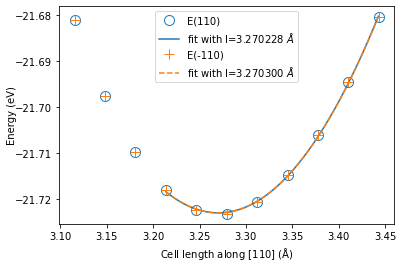

In [16]:
fig, ax = plt.subplots()
start = 3

ax.plot(strain_110.cell_length, strain_110.E_110, "o", ms=10, markerfacecolor="none", label="E(110)")

(A1, B1, C1), x_new, y_new = quadratic_fit(strain_110["cell_length"].values, strain_110["E_110"], start=start)
l1 = -B1 / (2.0 * A1)
print(l1)

ax.plot(x_new, y_new, "C0-", label=f"fit with l={l1:4f} $\AA$")

ax.plot(strain_110.cell_length, strain_110["E_-110"], "+", label="E(-110)", ms=10)

(A1, B1, C1), x_new, y_new = quadratic_fit(strain_110["cell_length"].values, strain_110["E_-110"], start=start)
l2 = -B1 / (2.0 * A1)
print("Magnetostriction $\lambda^{\sigma, 2}$:")
print(l2)

ax.plot(x_new, y_new, "C1--", label=f"fit with l={l2:4f} $\AA$")
print("Magnetostriction $\lambda^{\sigma, 2}\ 10^{-6}$")
print(2.0e6* (l1 - l2) / (l1 + l2) )

ax.set_xlabel("Cell length along [110] ($\mathrm{\AA}$)")
ax.set_ylabel("Energy (eV)", labelpad=-2)

ax.legend()
fig.savefig("EOS.pdf")
fig.savefig("EOS.png")

In [18]:
smaller_strain_results = pd.read_csv("smaller_strain_results.csv", index_col=0)
smaller_strain_results

,collinear_energy,delta,parallel_energy,perpendicular_energy,strain
0,-21.386406,1.245000e-05,-21.718122,-21.718109,-0.020
1,-21.389495,1.220000e-05,-21.720774,-21.720762,-0.015
2,-21.391656,8.440000e-06,-21.722499,-21.722490,-0.010
3,-21.392913,4.390000e-06,-21.723322,-21.723318,-0.005
4,-21.393291,6.800000e-07,-21.723273,-21.723272,0.000
5,-21.392818,-4.120000e-06,-21.722376,-21.722380,0.005
6,-21.391521,-9.360000e-06,-21.720659,-21.720669,0.010
7,-21.389424,-1.407000e-05,-21.718146,-21.718160,0.015
8,-21.386552,-1.992000e-05,-21.714860,-21.714880,0.020


<AxesSubplot:xlabel='strain', ylabel='collinear_energy'>

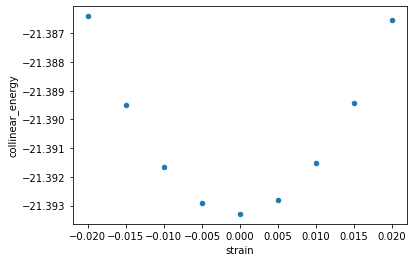

In [51]:
smaller_strain_results.plot(x="strain", y="collinear_energy", kind="scatter")

In [42]:
l0 = 3.279294

smaller_strain_results["cell_length"] = l0 + l0 * smaller_strain_results["strain"]

smaller_strain_results.to_csv("smaller_strain_110_results.csv")

<AxesSubplot:xlabel='cell_length', ylabel='collinear_energy'>

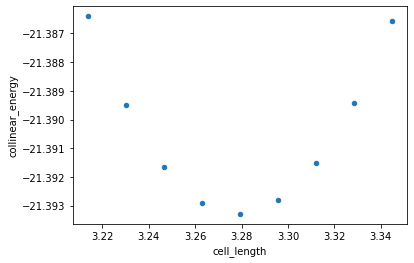

In [52]:
smaller_strain_results.plot(x="cell_length", y="collinear_energy", kind="scatter")

[-0.00092091]
[2.85641018e-05]


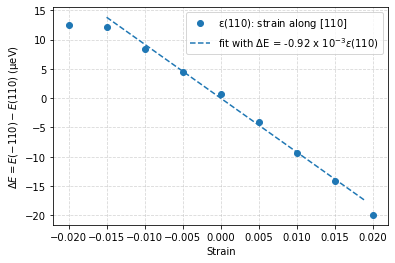

In [57]:
fig, ax = plt.subplots()

ax.plot(smaller_strain_results.strain, smaller_strain_results.delta * 1.0e6, "o", label="$\mathrm{\epsilon(110)}$: strain along [110]")

B, x_new, y_new = linear_fit(smaller_strain_results["strain"].values, smaller_strain_results.delta, start=1)
ax.plot(x_new, y_new * 1.0e6, "C0--", label="fit with $\mathrm{\Delta E}$ = " + f"{B*1.0e3:.2f} x " + "$\mathrm{10^{-3}} \epsilon(110)$")

ax.grid(True, linestyle="dashed", alpha=0.5)

ax.legend()

ax.set_xlabel("Strain")

ax.set_ylabel("$\Delta E = E(-110) - E(110)$ ($\mathrm{\mu eV}$)")
fig.savefig("smaller_strain_magnetostriction.png")
fig.savefig("smaller_strain_magnetostriction.pdf")

[  1.57660139 -10.31430333  -4.85404794]
[0.01420878 0.09319092 0.15278198]
3.2710561341678415
[  1.57566147 -10.30839528  -4.86331373]
[0.01410205 0.09249105 0.15163474]
Magnetostriction $\lambda^{\sigma, 2}$:
3.2711326329811
Magnetostriction $\lambda^{\sigma, 2}\ 10^{-6}$
-23.386305709427244


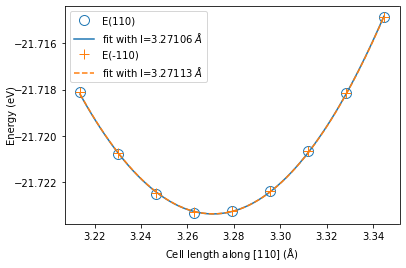

In [58]:
fig, ax = plt.subplots()
start = 0

smaller_strain_results["E_110"] = smaller_strain_results.parallel_energy
smaller_strain_results["E_-110"] = smaller_strain_results.perpendicular_energy

ax.plot(smaller_strain_results.cell_length, smaller_strain_results.E_110, "o", ms=10, markerfacecolor="none", label="E(110)")

(A1, B1, C1), x_new, y_new = quadratic_fit(smaller_strain_results["cell_length"].values, smaller_strain_results["E_110"], start=start)
l1 = -B1 / (2.0 * A1)
print(l1)

ax.plot(x_new, y_new, "C0-", label=f"fit with l={l1:.5f} $\AA$")

ax.plot(smaller_strain_results.cell_length, smaller_strain_results["E_-110"], "+", label="E(-110)", ms=10)

(A1, B1, C1), x_new, y_new = quadratic_fit(smaller_strain_results["cell_length"].values, smaller_strain_results["E_-110"], start=start)
l2 = -B1 / (2.0 * A1)
print("Magnetostriction $\lambda^{\sigma, 2}$:")
print(l2)

ax.plot(x_new, y_new, "C1--", label=f"fit with l={l2:.5f} $\AA$")
print("Magnetostriction $\lambda^{\sigma, 2}\ 10^{-6}$")
print(2.0e6* (l1 - l2) / (l1 + l2) )

ax.set_xlabel("Cell length along [110] ($\mathrm{\AA}$)")
ax.set_ylabel("Energy (eV)", labelpad=-3)

ax.legend()
fig.savefig("smaller_strain_EOS.png")
fig.savefig("smaller_strain_EOS.pdf")